In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("CTG3.csv")
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240,357,0,0,0,0,0,0,0,120,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,5,632,4,0,4,2,0,0,0,132,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,177,779,2,0,5,2,0,0,0,133,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,411,1192,2,0,6,2,0,0,0,134,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,533,1147,4,0,5,0,0,0,0,132,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1


In [3]:
# Define feature set
X = df.copy()
X.drop("NSP", axis=1, inplace=True)
X.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS
0,240,357,0,0,0,0,0,0,0,120,...,-1,-1,-1,-1,-1,-1,-1,1,-1,9
1,5,632,4,0,4,2,0,0,0,132,...,-1,-1,-1,-1,1,-1,-1,-1,-1,6
2,177,779,2,0,5,2,0,0,0,133,...,-1,-1,-1,-1,1,-1,-1,-1,-1,6
3,411,1192,2,0,6,2,0,0,0,134,...,-1,-1,-1,-1,1,-1,-1,-1,-1,6
4,533,1147,4,0,5,0,0,0,0,132,...,1,-1,-1,-1,-1,-1,-1,-1,-1,2


In [4]:
# Define target vector
y = df["NSP"].ravel()
y[:5]

array([2, 1, 1, 1, 1])

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [5]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(1594, 41)

In [6]:
# Create StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fit standard scaler
X_scaler = scaler.fit(X_train)

In [8]:
# scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create a random classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [10]:
# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [11]:
# make predictions
predictions = rf_model.predict(X_test_scaled)

In [12]:
# Model evaluation
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"]
)

acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)

print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,413,1,0
Actual 1,4,70,0
Actual 2,0,1,43


Accuracy Score: 0.9887218045112782
Classification Report
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       414
           2       0.97      0.95      0.96        74
           3       1.00      0.98      0.99        44

    accuracy                           0.99       532
   macro avg       0.99      0.97      0.98       532
weighted avg       0.99      0.99      0.99       532



In [14]:
# Feature importance
importance = rf_model.feature_importances_

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.23950083844840214, 'CLASS'),
 (0.12772894576128124, 'SUSP'),
 (0.06486823065124746, 'MSTV'),
 (0.06049198626440236, 'E'),
 (0.05420838514085508, 'ALTV'),
 (0.051594970507744885, 'ASTV'),
 (0.05042076784979302, 'LD'),
 (0.03964718632798278, 'FS'),
 (0.03836435747549595, 'Mean'),
 (0.024655842596330614, 'DP.1'),
 (0.023889967324573182, 'Mode'),
 (0.021921568685454546, 'A'),
 (0.019196914832895574, 'Median'),
 (0.017444735097005, 'AC'),
 (0.01706639290620248, 'Variance'),
 (0.01613735939173541, 'AC.1'),
 (0.014891077268580667, 'DP'),
 (0.013732602936730561, 'Width'),
 (0.011480693749566435, 'Min'),
 (0.011441918630548326, 'MLTV'),
 (0.010303662245911232, 'e'),
 (0.009938295260416943, 'LB'),
 (0.0077820669351313584, 'Max'),
 (0.0063082917121045756, 'UC'),
 (0.0060716198111941625, 'UC.1'),
 (0.005760039324466813, 'b'),
 (0.005488189144269203, 'Nmax'),
 (0.00456997149626946, 'B'),
 (0.004059416732617831, 'DL'),
 (0.003932633229698718, 'FM.1'),
 (0.00369807405135876, 'DE'),
 (0.0036892247

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

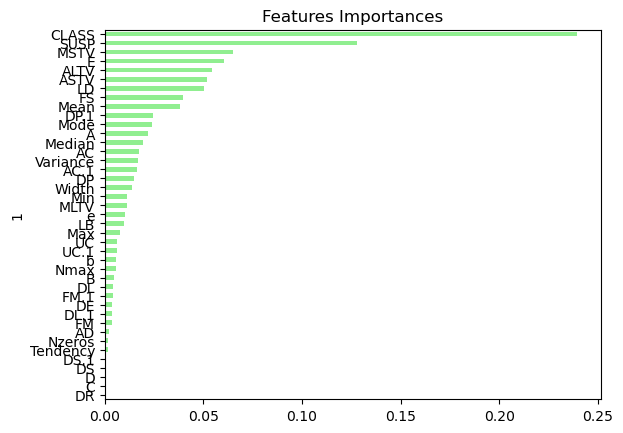

In [15]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [16]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

# Addit - score the model
print(f"Training data score: {classifier.score(X_train, y_train)}")
print(f"Testing data score: {classifier.score(X_test, y_test)}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Training data score: 0.9284818067754078
Testing data score: 0.9078947368421053


/Users/david/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [17]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.tail(10)

,Prediction,Actual
522,1,1
523,2,2
524,1,1
525,1,1
526,1,1
527,1,2
528,1,1
529,1,1
530,1,1
531,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [18]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9078947368421053

In [19]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[404,   3,   7],
       [ 26,  48,   0],
       [  4,   9,  31]])

In [20]:
# Print the classification report for the model
target_names = ["State 0: Normal", "State 1: Suspicious", "State 2: Pathologic"]
print(classification_report(y_test, predictions, target_names=target_names))

                     precision    recall  f1-score   support

    State 0: Normal       0.93      0.98      0.95       414
State 1: Suspicious       0.80      0.65      0.72        74
State 2: Pathologic       0.82      0.70      0.76        44

           accuracy                           0.91       532
          macro avg       0.85      0.78      0.81       532
       weighted avg       0.90      0.91      0.90       532

